In [1]:
from __future__ import division, print_function
import h5py
import numpy as np

In [20]:
def make_labeled_heatmap(human_method_names,method_names, comparisons):
    print(method_names)
    print("\n".join([str(round(x,2)) for x in [np.median(method_name_to_vals[method_name]) for method_name in method_names]]))
    print("\n".join(["\t".join([str(round(x,2)) for x in row])
               for row in comparisons]))

    
    fig, ax = plt.subplots(figsize=(11,11))
    im = ax.imshow(comparisons)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(method_names)))
    ax.set_yticks(np.arange(len(method_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(human_method_names)
    ax.set_yticklabels(human_method_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(method_names)):
        for j in range(len(method_names)):
            text = ax.text(j, i, np.round(comparisons[i, j],2),
                           ha="center", va="center", color="r")

    #ax.set_title("Proportion of examples where method in row is better than method in column")
    fig.tight_layout()
    plt.show()

In [21]:
fh = h5py.File("diff_cell_type_model_fidelity_results.h5","r")

In [22]:
fh['HepG2'].keys()

[u'interspersed',
 u'random',
 u'scores_deeplift_genomicsdefault_avgposref',
 u'scores_deeplift_genomicsdefault_dinucshuff',
 u'scores_deeplift_genomicsdefault_flatref',
 u'scores_deeplift_rescale_avgposref',
 u'scores_deeplift_rescale_dinucshuff',
 u'scores_deeplift_rescale_flatref',
 u'scores_grad_times_inp_flatref',
 u'scores_integrated_grad10_dinucshuff',
 u'scores_integrated_grad20_avgposref',
 u'scores_integrated_grad20_dinucshuff',
 u'scores_integrated_grad20_flatref',
 u'scores_integrated_grad2_dinucshuff',
 u'scores_integrated_grad5_dinucshuff',
 u'scores_ism']

('scores_ism', 'scores_deeplift_rescale_dinucshuff', 'scores_deeplift_genomicsdefault_dinucshuff', 'scores_grad_times_inp_flatref', 'scores_integrated_grad20_dinucshuff', 'random')
28.04
28.37
27.81
24.96
22.55
10.28
0.5	0.51	0.54	0.77	0.85	0.98
0.49	0.5	0.55	0.75	0.89	0.99
0.46	0.45	0.5	0.7	0.86	0.99
0.23	0.25	0.3	0.5	0.73	0.97
0.15	0.11	0.14	0.27	0.5	0.94
0.02	0.01	0.01	0.03	0.06	0.5


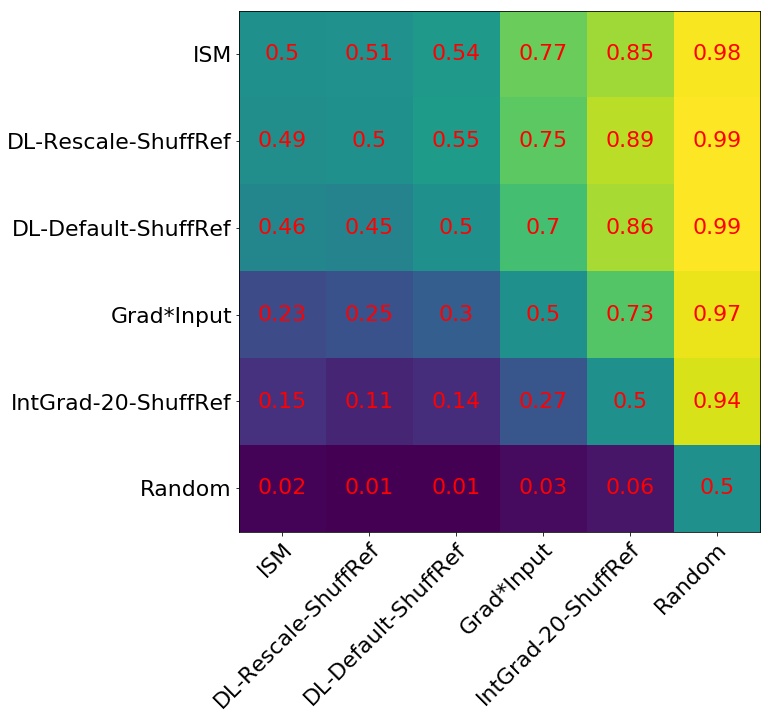

('scores_deeplift_rescale_dinucshuff', 'scores_deeplift_rescale_avgposref', 'scores_deeplift_rescale_flatref', 'scores_grad_times_inp_flatref', 'random')
28.37
20.75
20.55
24.96
10.28
0.5	0.94	0.92	0.75	0.99
0.06	0.5	0.49	0.2	0.9
0.08	0.51	0.5	0.2	0.9
0.25	0.8	0.8	0.5	0.97
0.01	0.1	0.1	0.03	0.5


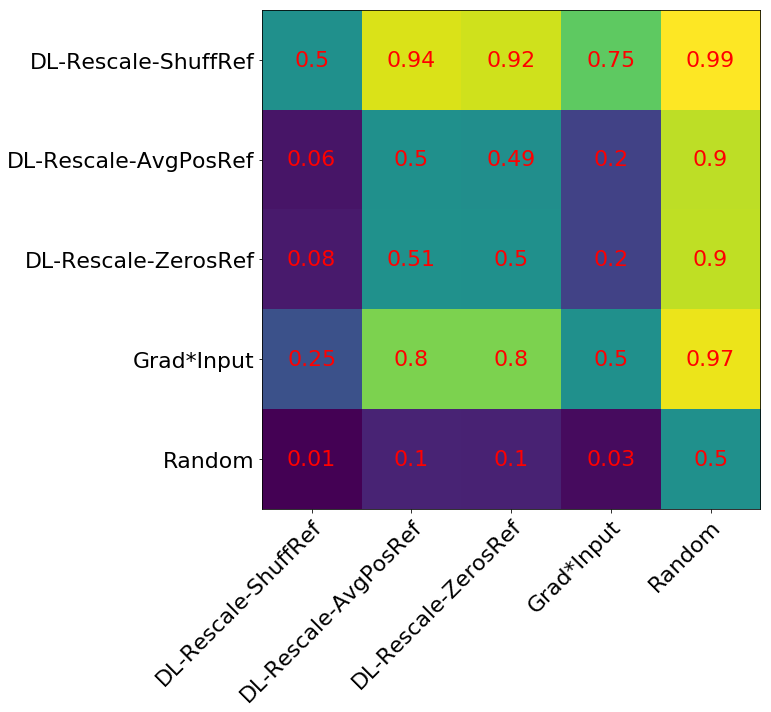

('scores_deeplift_genomicsdefault_dinucshuff', 'scores_deeplift_genomicsdefault_flatref', 'scores_deeplift_genomicsdefault_avgposref', 'scores_grad_times_inp_flatref', 'random')
27.81
22.36
22.26
24.96
10.28
0.5	0.86	0.88	0.7	0.99
0.14	0.5	0.51	0.3	0.93
0.12	0.49	0.5	0.3	0.93
0.3	0.7	0.7	0.5	0.97
0.01	0.07	0.07	0.03	0.5


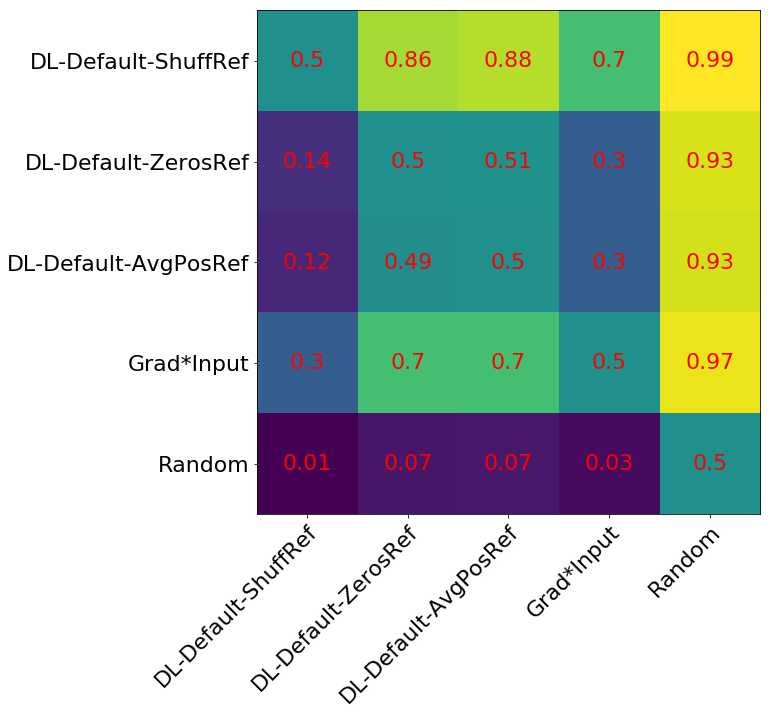

('scores_integrated_grad20_dinucshuff', 'scores_integrated_grad20_flatref', 'scores_integrated_grad20_avgposref', 'scores_grad_times_inp_flatref', 'random')
22.55
23.15
22.54
24.96
10.28
0.5	0.45	0.55	0.27	0.94
0.55	0.5	0.61	0.33	0.95
0.45	0.39	0.5	0.27	0.94
0.73	0.67	0.73	0.5	0.97
0.06	0.05	0.06	0.03	0.5


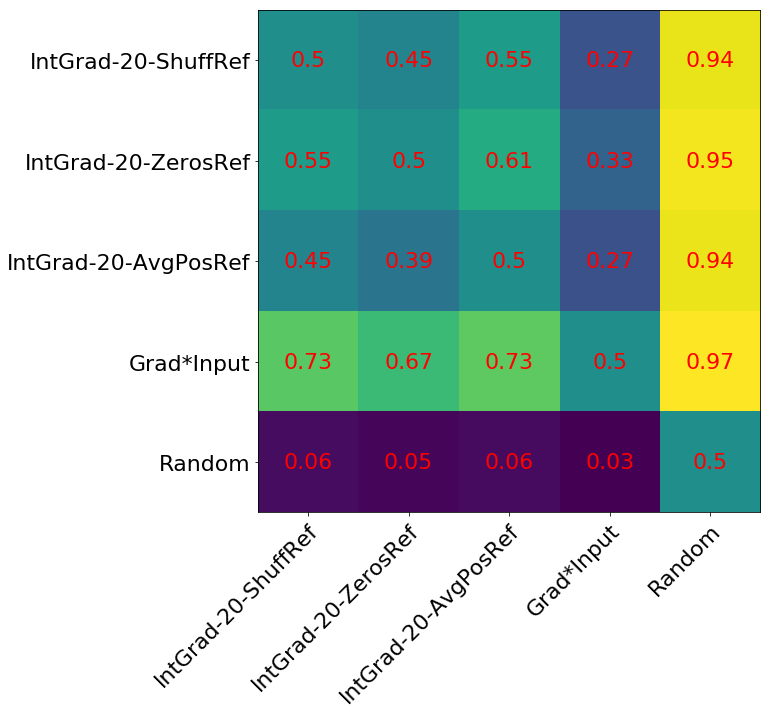

('scores_integrated_grad20_dinucshuff', 'scores_integrated_grad10_dinucshuff', 'scores_integrated_grad5_dinucshuff', 'scores_integrated_grad2_dinucshuff', 'random')
22.55
22.48
21.71
21.71
10.28
0.5	0.52	0.59	0.59	0.94
0.48	0.5	0.57	0.57	0.93
0.41	0.43	0.5	0.5	0.9
0.41	0.43	0.5	0.5	0.9
0.06	0.07	0.1	0.1	0.5


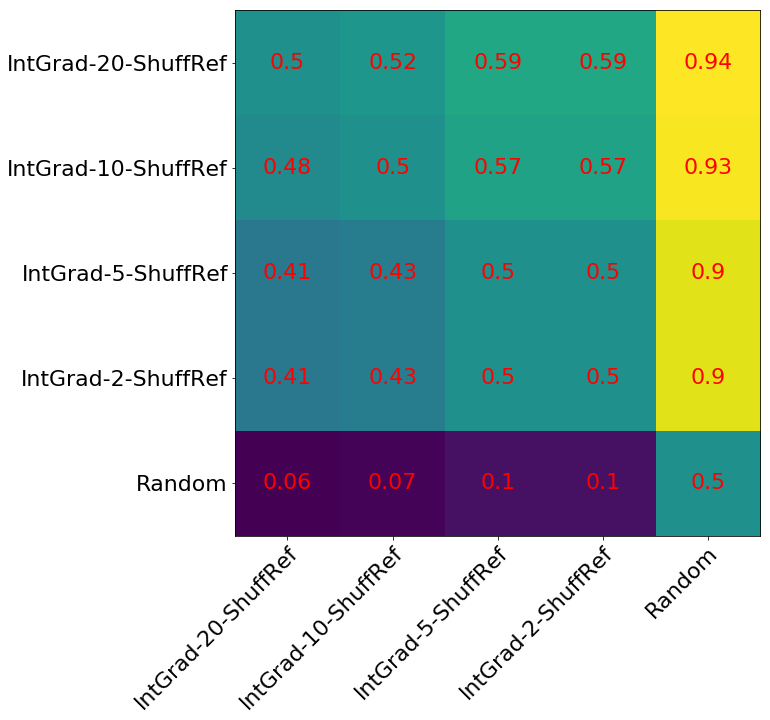

In [24]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 22})

method_groupings = [
   [('scores_ism','ISM'),  
    ('scores_deeplift_rescale_dinucshuff','DL-Rescale-ShuffRef'),
    ('scores_deeplift_genomicsdefault_dinucshuff','DL-Default-ShuffRef'),
    ('scores_grad_times_inp_flatref','Grad*Input'),
    ('scores_integrated_grad20_dinucshuff','IntGrad-20-ShuffRef'),
    ('random','Random')
   ],
    
    [
    ('scores_deeplift_rescale_dinucshuff','DL-Rescale-ShuffRef'),
    ('scores_deeplift_rescale_avgposref','DL-Rescale-AvgPosRef'),
    ('scores_deeplift_rescale_flatref','DL-Rescale-ZerosRef'),
    ('scores_grad_times_inp_flatref','Grad*Input'),
    ('random','Random')
    ],
    
    [
    ('scores_deeplift_genomicsdefault_dinucshuff','DL-Default-ShuffRef'),
    ('scores_deeplift_genomicsdefault_flatref','DL-Default-ZerosRef'),
    ('scores_deeplift_genomicsdefault_avgposref','DL-Default-AvgPosRef'),
    ('scores_grad_times_inp_flatref','Grad*Input'),
    ('random','Random')
    ],
    
    [
    ('scores_integrated_grad20_dinucshuff','IntGrad-20-ShuffRef'),
    ('scores_integrated_grad20_flatref','IntGrad-20-ZerosRef'),
    ('scores_integrated_grad20_avgposref','IntGrad-20-AvgPosRef'),
    ('scores_grad_times_inp_flatref','Grad*Input'),
    ('random','Random')
    ],
    
    [
    ('scores_integrated_grad20_dinucshuff','IntGrad-20-ShuffRef'),
    ('scores_integrated_grad10_dinucshuff','IntGrad-10-ShuffRef'),
    ('scores_integrated_grad5_dinucshuff','IntGrad-5-ShuffRef'),
    ('scores_integrated_grad2_dinucshuff','IntGrad-2-ShuffRef'),
    ('random','Random')
    ],
]

cell_types = ['HepG2', 'GM12878', 'K562', 'MCF-7', 'A549']

for method_grouping in method_groupings:
    method_names,human_method_names = zip(*method_grouping)
    
    method_name_to_vals = dict([
        (method_name, np.array([x for cell_type in cell_types for x in np.array(fh[cell_type][method_name])]))
        for method_name in method_names
    ])
    
    comparisons = np.zeros((len(method_names), len(method_names)))

    for idx1,method1_name in enumerate(method_names):
        for idx2,method2_name in enumerate(method_names):
            proportion_method1_greater =\
                ((np.sum(method_name_to_vals[method1_name] > method_name_to_vals[method2_name])
                 + 0.5*np.sum(method_name_to_vals[method1_name] == method_name_to_vals[method2_name]))/
                 len(method_name_to_vals[method1_name]))
            comparisons[idx1, idx2] = proportion_method1_greater

    make_labeled_heatmap(human_method_names,method_names,comparisons)